<a href="https://colab.research.google.com/github/aatiqa-ghazali/covid/blob/main/Data_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing-Libraries

In [ ]:
import os , glob
import nibabel as nib
import numpy as np 
import matplotlib.pyplot as plt
import cv2

# STEP 1 - Load and visualize data

In [ ]:


dataInputPath = '/content/drive/MyDrive/part1/'
imagePathInput = os.path.join(dataInputPath, 'image/')
labelPathInput = os.path.join(dataInputPath, 'label/')
dataOutputPath='/content/drive/MyDrive/newdata/slices/'
imgSliceOutput= os.path.join(dataInputPath, 'data/')
labelSliceOutput = os.path.join(dataInputPath, 'label/')
# STEP 2 - Image normalization
HOUNSFIELD_MIN = -1000
HOUNSFIELD_MAX = 2000
HOUNSFIELD_RANGE = HOUNSFIELD_MAX - HOUNSFIELD_MIN

# STEP 3 - Slicing and saving ithasnothingtodowithnormalizationtheyarejustconstans
SLICE_X = True
SLICE_Y = True
SLICE_Z = False

SLICE_DECIMATE_IDENTIFIER = 3


# Load image and see max min Hounsfield units

In [ ]:

imgPath = os.path.join(imagePathInput, 'case_7.nii.gz')
img = nib.load(imgPath).get_fdata()
#np.min(img), np.max(img), img.shape, type(img)
np.min(img), np.max(img), img.shape, type(img)

(0.25066666666666665, 1.0, (401, 274, 255), numpy.ndarray)

# Load image label and see max min Hounsfield units

In [ ]:

maskPath = os.path.join(labelPathInput, 'case_7.nii.gz')
mask = nib.load(maskPath).get_fdata()
np.min(mask), np.max(mask), mask.shape, type(mask)

(0.0, 1.0, (401, 274, 255), numpy.ndarray)

# Show image volume and label

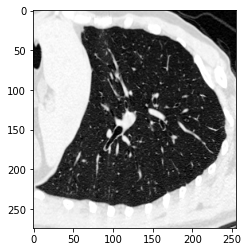

In [ ]:

imgvol = img[134,:,:]
plt.imshow(imgvol, cmap='gray')
plt.show()

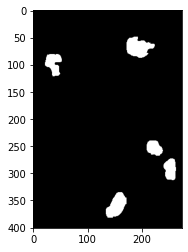

In [ ]:
# Show label volume
imgslice = mask[:,:,80]
plt.imshow(imgslice, cmap='gray')
plt.show()

# Normalize image

In [ ]:
#After image reconstruction, each pixel in the CT image is assigned a number, 
#referred to as the Hounsfield or CT number, which is a rescaled normalized function of the linear attenuation coefficient [1, 2].

def normalizeImageIntensityRange(img):
    img[img < HOUNSFIELD_MIN] = HOUNSFIELD_MIN
    img[img > HOUNSFIELD_MAX] = HOUNSFIELD_MAX
    return (img - HOUNSFIELD_MIN) / HOUNSFIELD_RANGE

nImg = normalizeImageIntensityRange(img)
np.min(nImg), np.max(nImg), nImg.shape, type(nImg)

(0.3334168888888889, 0.33366666666666667, (401, 274, 255), numpy.ndarray)

# Read image or mask volume

In [ ]:

def readImageVolume(imgPath, normalize=False):
    img = nib.load(imgPath).get_fdata()
    if normalize:
        return normalizeImageIntensityRange(img)
    else:
        return img
    
readImageVolume(imgPath, normalize=True)
readImageVolume(maskPath, normalize=False)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

# Save volume slice to file

In [ ]:

def saveSlice(img, fname, path):
    img = np.uint8(img * 255)
    fout = os.path.join(path, f'{fname}.png')
    cv2.imwrite(fout, img)
    print(f'[+] Slice saved: {fout}', end='\r')
    


# Slice image in all directions and save

In [ ]:

def sliceAndSaveVolumeImage(vol, fname, path):
    (dimx, dimy, dimz) = vol.shape
    print(dimx, dimy, dimz)
    cnt = 0
    if SLICE_X:
        cnt += dimx
        print('Slicing X: ')
        for i in range(dimx):
            saveSlice(vol[i,:,:], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_x', path)
            
    if SLICE_Y:
        cnt += dimy
        print('Slicing Y: ')
        for i in range(dimy):
            saveSlice(vol[:,i,:], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_y', path)
            
    if SLICE_Z:
        cnt += dimz
        print('Slicing Z: ')/content/drive/MyDrive/newdata/slices/data/case0-slice000_x.png
        for i in range(dimz):
            saveSlice(vol[:,:,i], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_z', path)
    return cnt

#Read and process image volumes

In [ ]:

for index, filename in enumerate(sorted(glob.iglob(imagePathInput+'*.nii.gz'))):
    img = readImageVolume(filename)
    print(filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
    numOfSlices = sliceAndSaveVolumeImage(img, 'case'+str(index), dataOutputPath+"data/")
    print(f'\n{filename}, {numOfSlices} slices created \n')

/content/drive/MyDrive/part1/image/case_1.nii.gz (346, 233, 186) 765 0.25066666666666665 1.0
346 233 186
Slicing X: 
Slicing Y: 
[+] Slice saved: /content/drive/MyDrive/newdata/slices/data/case0-slice232_y.png
/content/drive/MyDrive/part1/image/case_1.nii.gz, 579 slices created 

/content/drive/MyDrive/part1/image/case_10.nii.gz (361, 224, 70) 655 0.0 1.0
361 224 70
Slicing X: 
Slicing Y: 
[+] Slice saved: /content/drive/MyDrive/newdata/slices/data/case1-slice223_y.png
/content/drive/MyDrive/part1/image/case_10.nii.gz, 585 slices created 

/content/drive/MyDrive/part1/image/case_11.nii.gz (314, 226, 377) 917 0.25066666666666665 1.0
314 226 377
Slicing X: 
Slicing Y: 
[+] Slice saved: /content/drive/MyDrive/newdata/slices/data/case2-slice225_y.png
/content/drive/MyDrive/part1/image/case_11.nii.gz, 540 slices created 

/content/drive/MyDrive/part1/image/case_12.nii.gz (341, 246, 209) 796 0.25066666666666665 1.0
341 246 209
Slicing X: 
Slicing Y: 
[+] Slice saved: /content/drive/MyDrive/n

# Read and process image mask volumes

In [ ]:

for index, filename in enumerate(sorted(glob.iglob(labelPathInput+'*.nii.gz'))):
    img = readImageVolume(filename, False)
    print(filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
    numOfSlices = sliceAndSaveVolumeImage(img, 'case'+ str(index), dataOutputPath+"label/")
    print(f'\n{filename}, {numOfSlices} slices created \n')

/content/drive/MyDrive/part1/label/case_1.nii.gz (346, 233, 186) 765 0.0 1.0
346 233 186
Slicing X: 
Slicing Y: 
[+] Slice saved: /content/drive/MyDrive/newdata/slices/label/case0-slice232_y.png
/content/drive/MyDrive/part1/label/case_1.nii.gz, 579 slices created 

/content/drive/MyDrive/part1/label/case_10.nii.gz (361, 224, 70) 655 0.0 1.0
361 224 70
Slicing X: 
Slicing Y: 
[+] Slice saved: /content/drive/MyDrive/newdata/slices/label/case1-slice223_y.png
/content/drive/MyDrive/part1/label/case_10.nii.gz, 585 slices created 

/content/drive/MyDrive/part1/label/case_11.nii.gz (314, 226, 377) 917 0.0 1.0
314 226 377
Slicing X: 
Slicing Y: 
[+] Slice saved: /content/drive/MyDrive/newdata/slices/label/case2-slice225_y.png
/content/drive/MyDrive/part1/label/case_11.nii.gz, 540 slices created 

/content/drive/MyDrive/part1/label/case_12.nii.gz (341, 246, 209) 796 0.0 1.0
341 246 209
Slicing X: 
Slicing Y: 
[+] Slice saved: /content/drive/MyDrive/newdata/slices/label/case3-slice245_y.png
/con